# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# load the training dataset
data = pd.read_csv('/content/drive/MyDrive/Azure DS Certification/Create Machine Learning Models On Azure/Semana3/Challenges/Data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)



##Exploratory Analysis

**Observamos que no hay datos faltantes, por lo que no hay que imputar datos**

In [ ]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

Un poco de descripcion estadistica de nuestros atributos numericos

In [ ]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Histograma de precios

Observamos que la mayoria de los precios se acumula en valores menores a 80 unidades, el resto de precios pueden ser por situaciones extraordinarias

<Axes: >

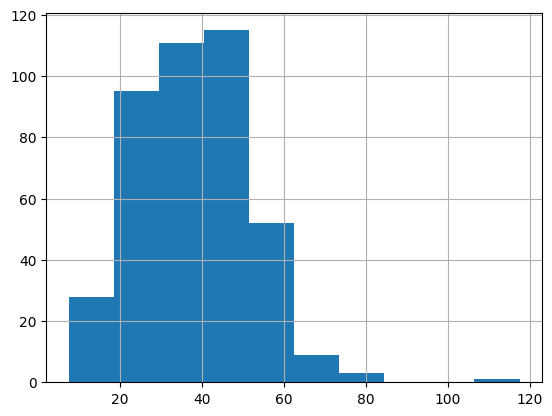

In [ ]:
data['price_per_unit'].hist()

**Solo considerare aquellos datos que tengan un valor de menos de 65 unidades**

<Axes: >

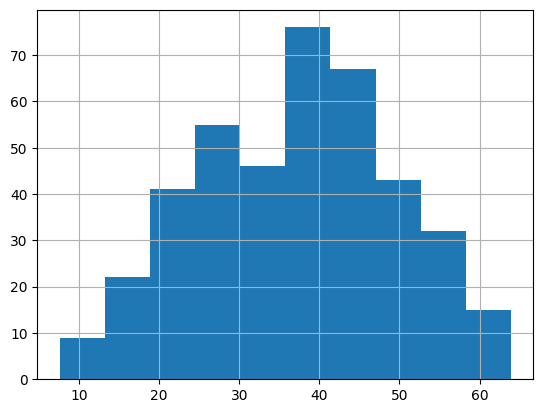

In [ ]:
data=data[data['price_per_unit']<65]

data['price_per_unit'].hist()

###Analicemos los atributos numericos

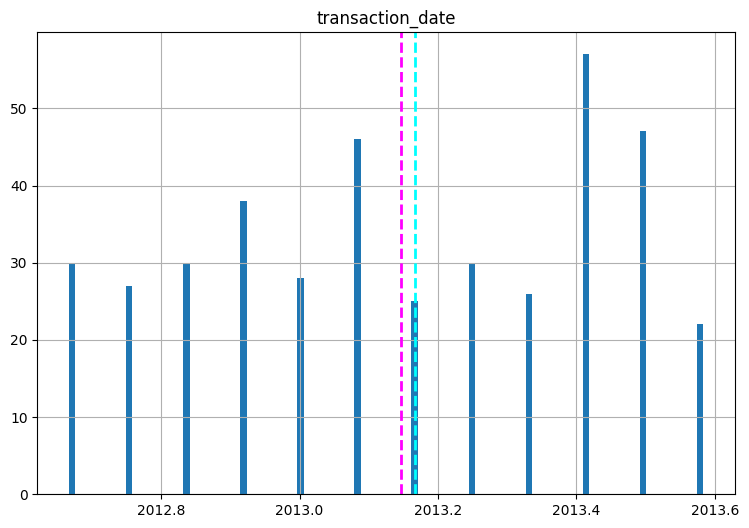

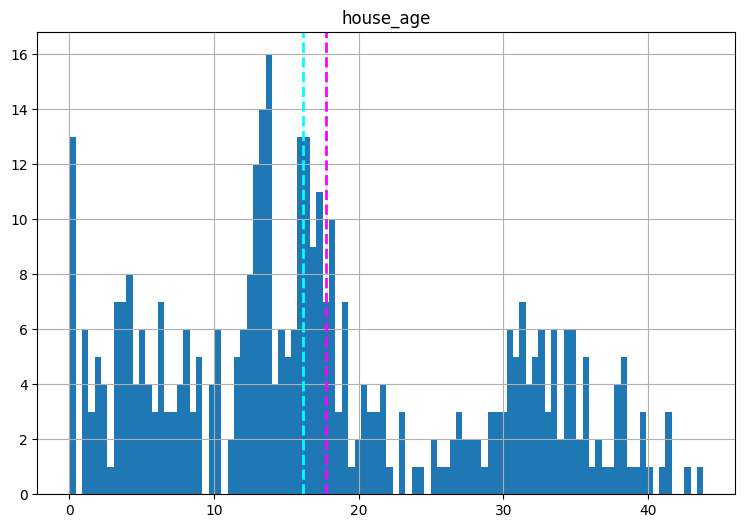

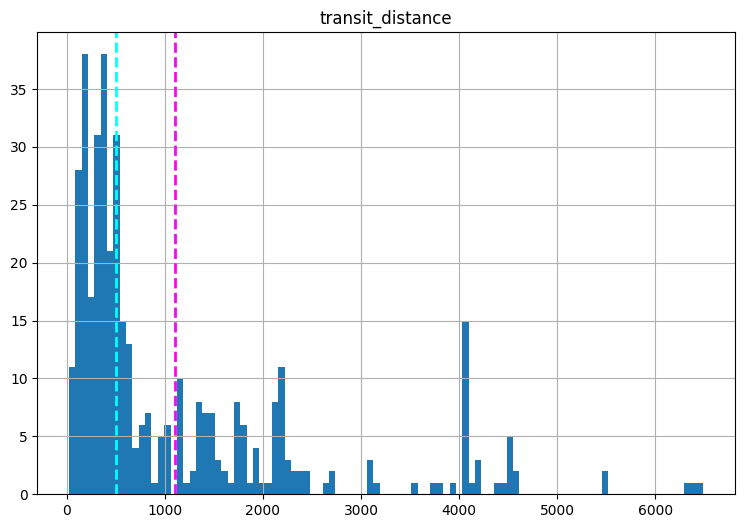

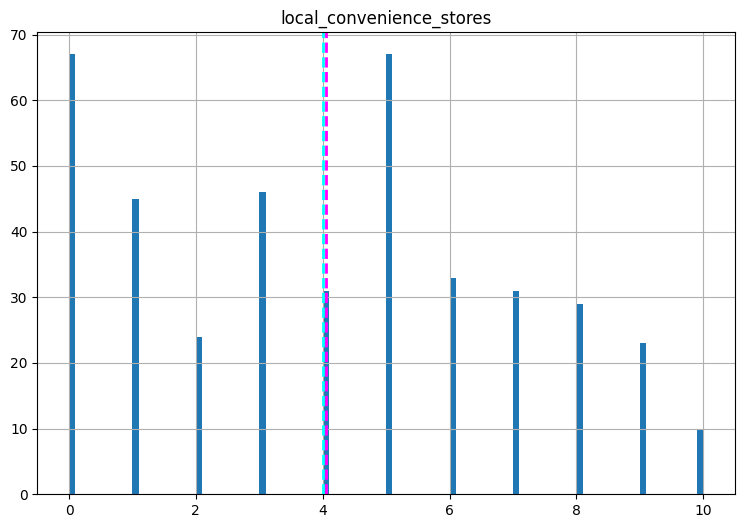

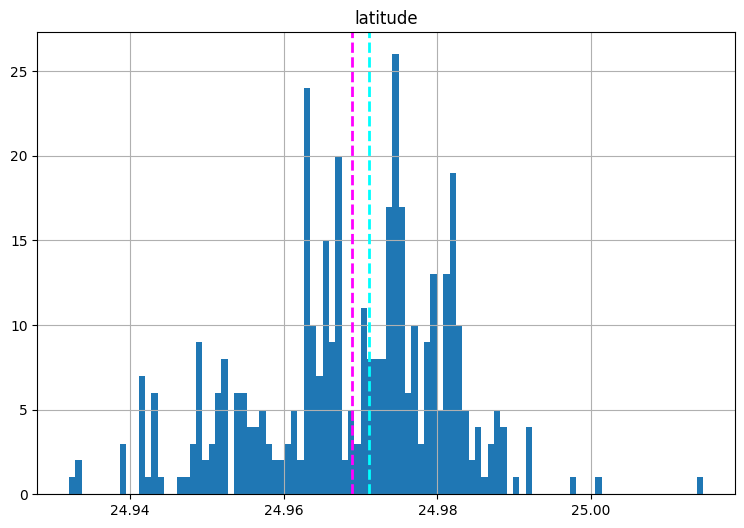

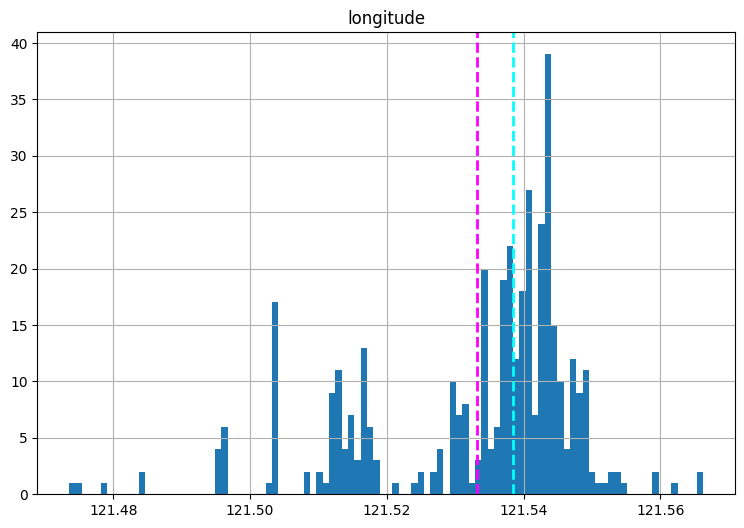

In [ ]:
#from matplotlib import pytplot as plt
import matplotlib.pyplot as plt
numeric_features=['transaction_date', 'house_age', 'transit_distance',
       'local_convenience_stores', 'latitude', 'longitude']
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

**Para una regresion siempre es util conocer la relacion entre la correlacion de las variables, ya que puede causar problemas de colinealidad**

<Axes: >

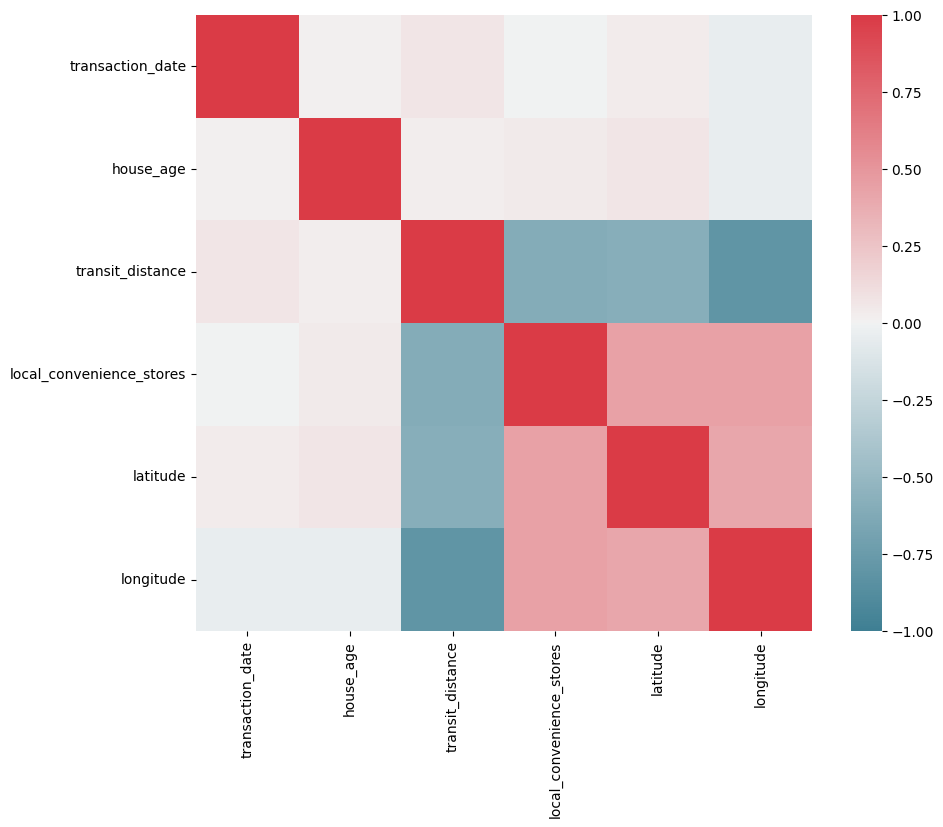

In [ ]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr =data.iloc[:,:-1].corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

### Correlacion atributo vs target

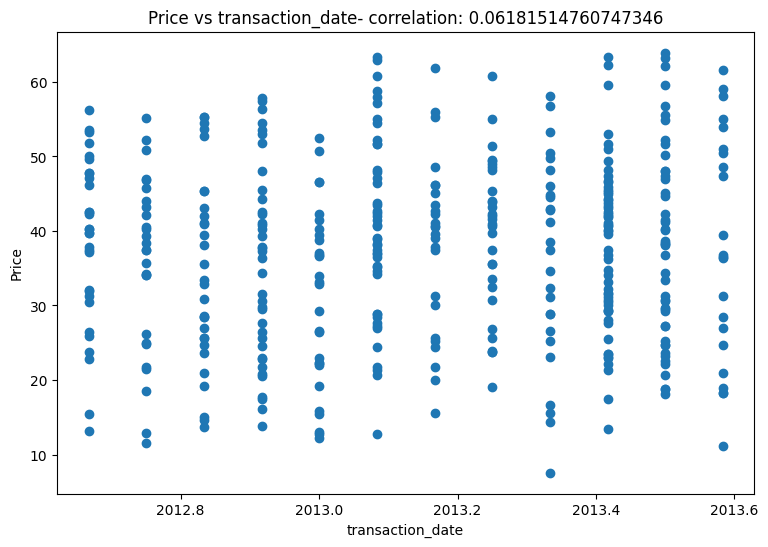

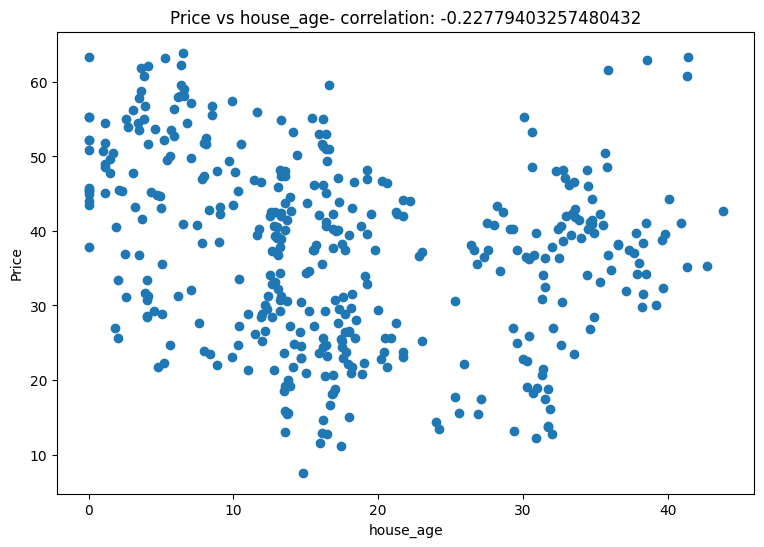

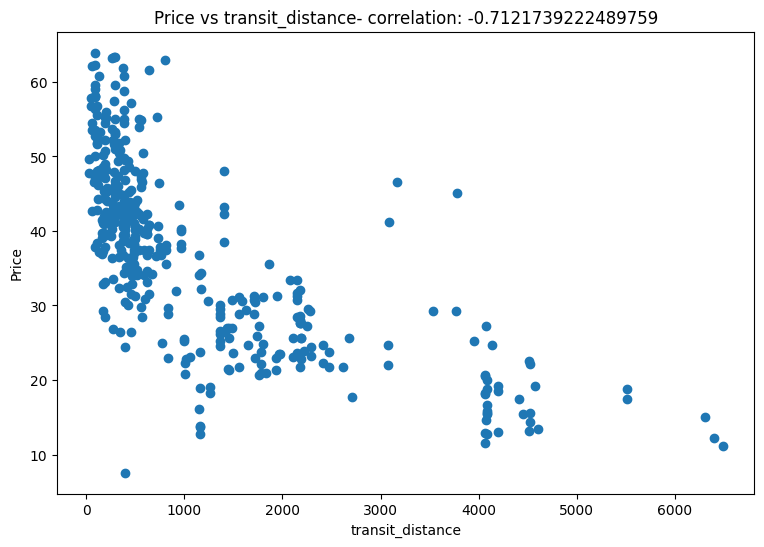

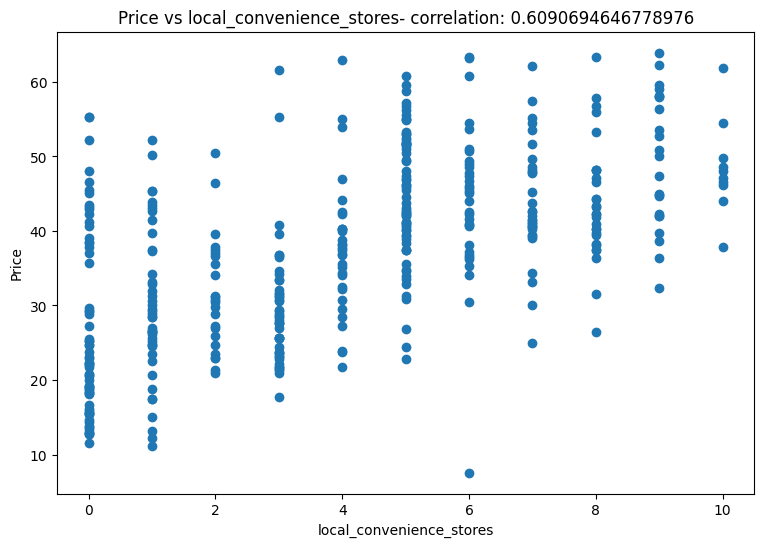

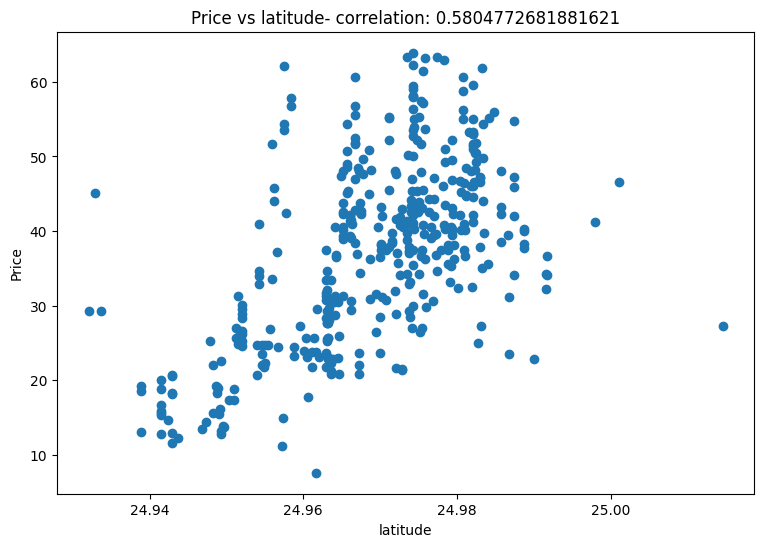

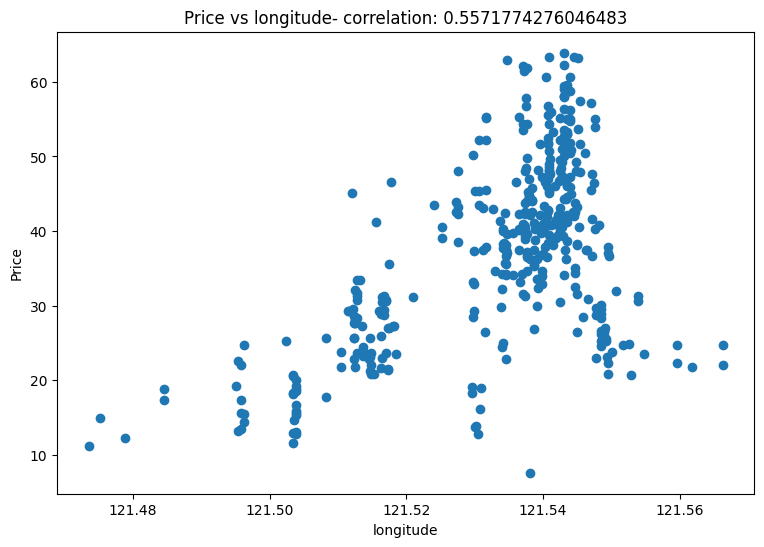

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('Price vs ' + col + '- correlation: ' + str(correlation))
plt.show()

**Se puede ver que atributos como**

1.  Transit Distance: Mayor distancia se relaciona con un menor precio
2.  Latitude y Longitude: Un mayor valor se relaciona con un mayor precio

**Tienen una relacion bastante lineal con el precio de la casa**


## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

###Baselines

In [ ]:
X,y=data.iloc[:, :-1].values, data.iloc[:, -1].values
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 284 rows
Test Set: 122 rows


In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

LinearRegression()
RMSE: 7.72365248172837


In [ ]:
# Fit a linear regression model on the training set
model = Ridge( ).fit(X_train, y_train)
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Ridge()
RMSE: 7.775364936664417


In [ ]:
# Fit a linear regression model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

GradientBoostingRegressor()
RMSE: 6.386132413818662


**Gradient Boosting Regression cumple el requisito desde el mas sencillo de sus representaciones**

### Baslines + Preprocesamiento de Atributos

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, OneHotEncoder

In [ ]:
# Define preprocessing for numeric columns (scale them)
numeric_features =[1,2,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [1, 2, 4, 5])])),
                ('regressor', LinearRegression())])
RMSE: 8.460433171031795


In [ ]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [1,2,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [1, 2, 4, 5])])),
                ('regressor', Ridge())])
RMSE: 8.383780905456653


In [ ]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])
RMSE: 6.501308546489797


### Optimizacion de hiperparametros

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('fitting',
                 GridSearchCV(cv=[(slice(None, None, None),
                                   slice(None, None, None))],
                              estimator=LinearRegression(),
                              param_grid={'fit_intercept': [True, False]},
                              return_train_score=True,
                              scoring=make_scorer(mean_squared_error)))])
RMSE: 8.507800404465202
R2: 0.41937612932442303


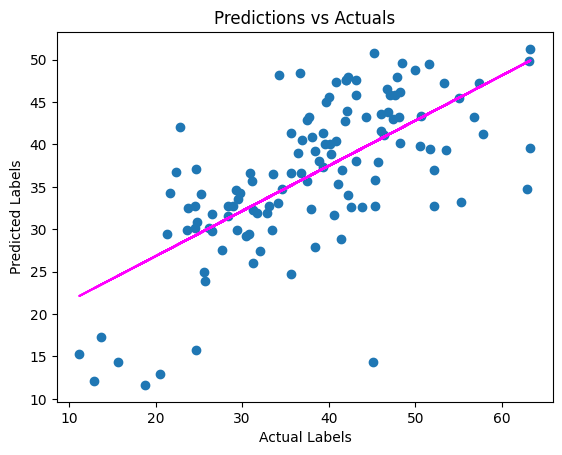

In [ ]:
from sklearn.model_selection import GridSearchCV

alg = LinearRegression()
# Try these hyperparameter values
params = {
 'fit_intercept': [True, False]
 }

score = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(alg, params, scoring=score, cv=[(slice(None), slice(None))], return_train_score=True)

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('fitting', gridsearch)])sc
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R2:", r2_score(y_test, predictions))


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('fitting',
                 GridSearchCV(cv=[(slice(None, None, None),
                                   slice(None, None, None))],
                              estimator=Ridge(),
                              param_grid={'alpha': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
                              return_train_score=True,
                              scoring=make_scorer(mean_squared_error)))])
RMSE: 7.881524751698324
R2: 0.501711586459383


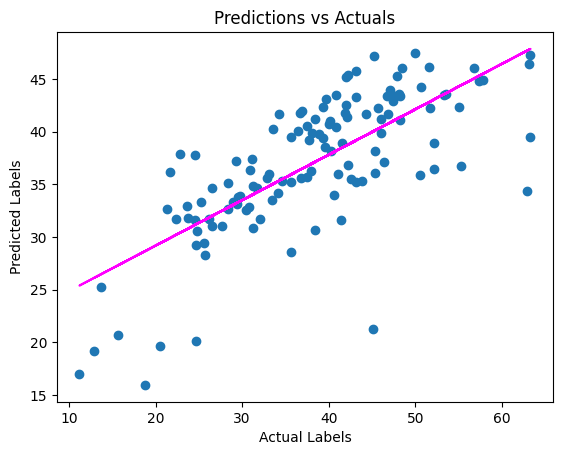

In [ ]:
from sklearn.model_selection import GridSearchCV

alg = Ridge()
# Try these hyperparameter values
params = {
 'alpha': np.arange(0,10,1)
 }

score = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(alg, params, scoring=score, cv=[(slice(None), slice(None))], return_train_score=True)

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('fitting', gridsearch)])
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R2:", r2_score(y_test, predictions))


# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('fitting',
                 GridSearchCV(cv=[(slice(None, None, None),
                                   slice(None, None, None))],
                              estimator=GradientBoostingRegressor(),
                              param_grid={'learning_rate': [0.1, 0.5, 1.0],
                                          'n_estimators': [50, 100, 150]},
                              return_train_score=True,
                              scoring=make_scorer(mean_squared_error)))])
RMSE: 6.314429566149037
R2: 0.680163114380347


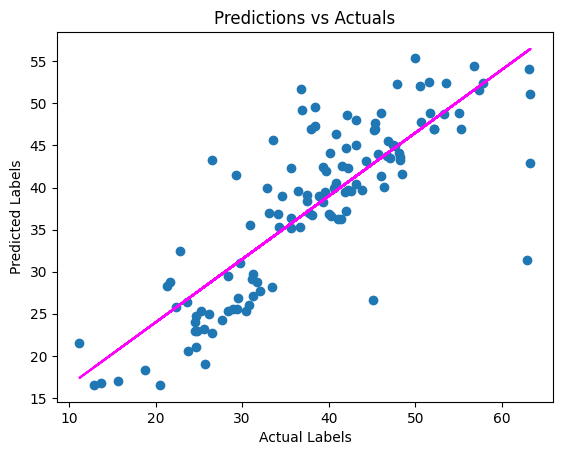

In [ ]:
from sklearn.model_selection import GridSearchCV

alg = GradientBoostingRegressor()
# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

score = make_scorer(mean_squared_error)
gridsearch=GridSearchCV(alg, params, scoring=score, cv=[(slice(None), slice(None))], return_train_score=True)

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5]
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
# Combine preprocessing steps
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('fitting', gridsearch)])
model = pipeline.fit(X_train, (y_train))
print (model)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print("R2:", r2_score(y_test, predictions))



# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [ ]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction
X_new = np.array([[2013.167, 16.2,289.3248,5,24.98203,121.54348],
                  [2013.000, 13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
48.91
16.74
